In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('random_5000_recipes.csv')

In [7]:
df.dtypes

Unnamed: 0               int64
breakfast               object
apetizer                object
lunch                   object
snack                   object
dinner                  object
ingredient_list         object
total_cooking_time     float64
average_rating         float64
kcal_sum                 int64
sugar_g_sum              int64
sodium_g_sum             int64
fat_g_sum              float64
saturated_fat_g_sum    float64
carbohydrates_g_sum    float64
fiber_g_sum            float64
protein_g_sum          float64
dtype: object

In [9]:
df.isna().sum()

Unnamed: 0             0
breakfast              0
apetizer               0
lunch                  0
snack                  0
dinner                 0
ingredient_list        0
total_cooking_time     0
average_rating         0
kcal_sum               0
sugar_g_sum            0
sodium_g_sum           0
fat_g_sum              0
saturated_fat_g_sum    0
carbohydrates_g_sum    0
fiber_g_sum            0
protein_g_sum          0
dtype: int64

In [11]:
numerical = df.select_dtypes("number")

In [12]:
numerical.columns

Index(['Unnamed: 0', 'total_cooking_time', 'average_rating', 'kcal_sum',
       'sugar_g_sum', 'sodium_g_sum', 'fat_g_sum', 'saturated_fat_g_sum',
       'carbohydrates_g_sum', 'fiber_g_sum', 'protein_g_sum'],
      dtype='object')

In [19]:
numerical = numerical.drop("Unnamed: 0", axis=1)

## Looking for correlations

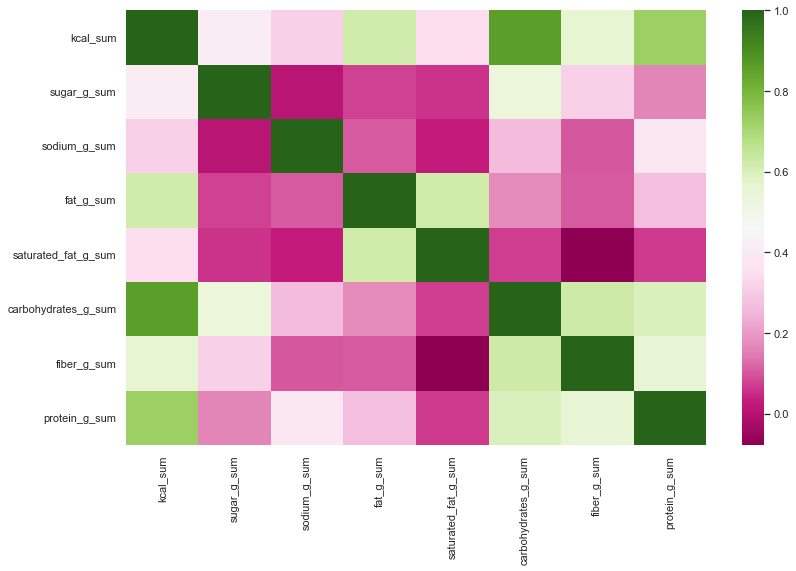

In [83]:
sns.set(rc = {'figure.figsize':(13,8)})
M_corr = numerical.corr()
sns.heatmap(M_corr, annot=False, cmap="PiYG")
plt.show()

In [30]:
numerical = numerical.drop("total_cooking_time",axis=1)
numerical = numerical.drop("average_rating",axis=1)

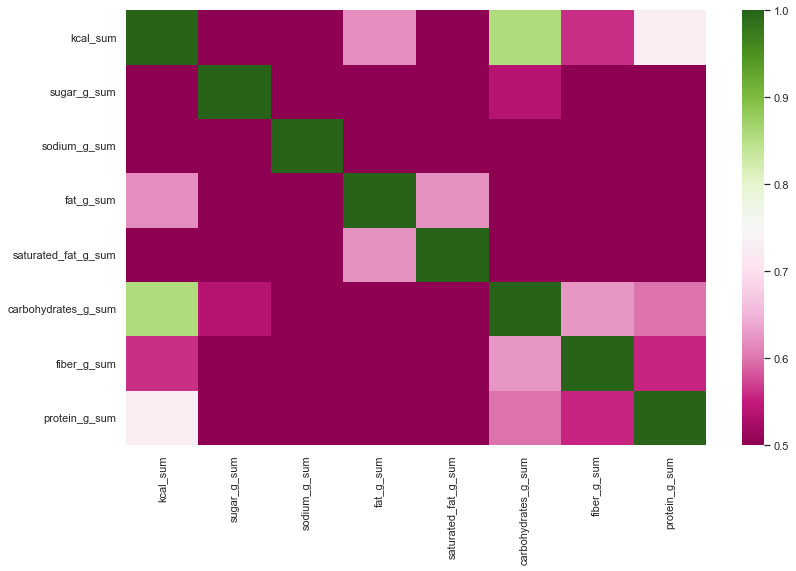

In [82]:
sns.set(rc = {'figure.figsize':(13,8)})
M_corr = numerical.corr()
sns.heatmap(M_corr, annot=False,cmap="PiYG", vmin=0.5, vmax=1.0)
plt.show()

The most interesting correlation we found is between proteins and carbohydrates. Legumes and nuts tend to be the highest-protein plant foods and are also high in carbohydrates.

It seems that if we increase our carbohydrate intake we will also increase our protein intake. This is interesting because it clashes with the belief that it is difficult to build muscle mass on a vegan diet.

## Predicting the amount of protein based on the rest of the nutrients.

In [84]:
y = numerical[['protein_g_sum']]
X = numerical.drop("protein_g_sum", axis = 1)

scaler = MinMaxScaler().fit(X)
X_n = scaler.transform(X)
X_n = pd.DataFrame(X_n,columns=X.columns)


X = X_n

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(1000, 7)
(4000, 1)
(1000, 1)


In [86]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [87]:
predictions_train = lm.predict(X_train)
r2_train = r2_score(y_train, predictions_train)
print("R2 of train sample:",r2_train,)

predictions_test = lm.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
r2_test
print('R2 test sample:',r2_test)

MSE = mean_squared_error(y_test,predictions_test)
RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))
MAE = mean_absolute_error(y_test, predictions_test)
print(" MSE: \n", MSE," \n RMSE: \n", RMSE, "\n MAE: \n", MAE)

R2 of train sample: 0.9003537877004313
R2 test sample: 0.9025740449337991
 MSE: 
 16.77240553508241  
 RMSE: 
 4.095412742945747 
 MAE: 
 3.082229916090915


## Hypotheses testing:

In [62]:
df_sample = numerical["protein_g_sum"].sample(30)

In [81]:
#H0: protein average >= 40
#H1: peorein average < 40 

In [79]:
st.ttest_1samp(df_sample,40.00)

Ttest_1sampResult(statistic=1.202875184327875, pvalue=0.23875357774673533)

In [80]:
st.ttest_1samp(df_sample,40)[1]/2

0.11937678887336767